# Dog-Cat Data Normalization

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1TR2Efy1Yz2oL8w476NVhkKl2JX_oofQU'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data25000.zip')

## Zip File Extraction

In [0]:
import zipfile
import os, os.path

In [0]:
DataPath = './data'

In [0]:
objZip = zipfile.ZipFile('./data25000.zip')
objZip.extractall(DataPath)

In [0]:
from IPython.display import Image

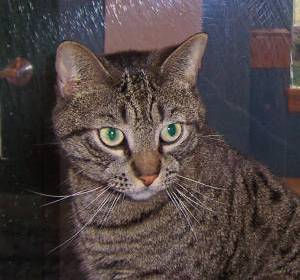

In [46]:
Image('./data/train/cat.1.jpg')

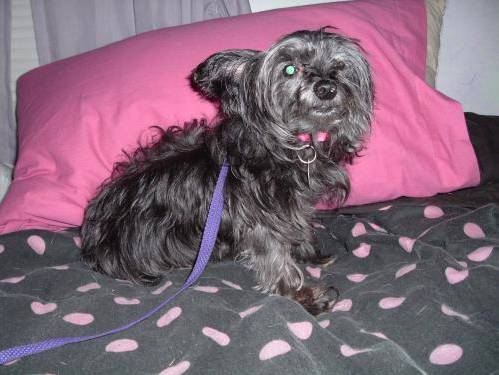

In [47]:
Image('./data/train/dog.0.jpg')

In [48]:
print("[TestData] Train : [%d]" % len(os.listdir('./data/train/') ) )

[TestData] Train : [25000]


Input Data Load SuccessFully!

## Install Pytorch

In [12]:
# torch 0.4 install for torch.no_grad()
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

# !pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
# !pip3 install torchvision

0.4.0
True


## Make Data Loader

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.RandomCrop(32, padding=4),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [0]:
trainset = torchvision.datasets.ImageFolder(root='./data', transform=transform_train)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=False, num_workers=2)

In [0]:
# trainset.imgs

In [6]:
import numpy as np

pop_mean = []
pop_std0 = []
pop_std1 = []
for index, (inputs, targets) in enumerate(trainloader):
# for i, data in enumerate(trainloader, 0):
    # shape (batch_size, 3, height, width)
   
    numpy_image = inputs.numpy()
    
    # shape (3,)
    batch_mean = np.mean(numpy_image, axis=(0,2,3))
    batch_std0 = np.std(numpy_image, axis=(0,2,3))
    batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    
    pop_mean.append(batch_mean)
    pop_std0.append(batch_std0)
    pop_std1.append(batch_std1)
    
    # print(index)
    if index % 100 == 0:
      print(index)

# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)
pop_mean = np.array(pop_mean).mean(axis=0)
pop_std0 = np.array(pop_std0).mean(axis=0)
pop_std1 = np.array(pop_std1).mean(axis=0)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [10]:
print(pop_mean)

[0.48833174 0.4550874  0.41697174]


In [11]:
print(pop_std0)

[0.2562639  0.24982646 0.25225964]


In [12]:
print(pop_std1)

[0.25626424 0.24982679 0.25225994]
